In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Tel

/content/drive/MyDrive/Tel


In [3]:
import time
import os

In [4]:
# 필요한 패키지 불러오기
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 데이터셋 불러오기
data = pd.read_csv("tele_customer_Vaule_Up.csv")
data

,CustomerId,ChurnLabel,Monthly_charge,ChurnScore,AvgDownloadGB,noReferrals,PaymentMethod,AvgRoamCharge,CustomerLTV,OnlineSecurity,TechSupport,Dependents,OnlineBackup,Age
0,C-10001,No,83590.0,65,16,2,신용카드,47910,2205,No,Yes,No,Yes,37
1,C-10002,No,68929.0,66,10,0,신용카드,12090,5414,No,No,No,No,46
2,C-10003,Yes,98180.0,71,30,0,계좌이체,38080,4479,No,No,No,No,50
3,C-10004,Yes,112743.0,99,4,1,계좌이체,31410,3714,No,No,No,Yes,78
4,C-10005,Yes,94500.0,68,11,3,신용카드,8360,3464,No,Yes,No,No,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,C-17039,No,64428.0,59,59,0,신용카드,52770,3161,Yes,Yes,No,No,20
6859,C-17040,Yes,101891.0,68,17,1,계좌이체,18310,5248,No,No,No,No,40
6860,C-17041,No,56600.0,33,51,0,신용카드,21020,5870,No,No,No,Yes,22
6861,C-17042,No,80108.0,59,58,5,신용카드,2370,4792,Yes,Yes,No,No,21


In [5]:
# PaymentMethod 컬럼(column)의 값을 신용카드는 0, 계좌이체는 1로 변환합니다.
data["PaymentMethod"] = data["PaymentMethod"].apply(lambda x: 0 if x == "신용카드" else 1)

# OnlineSecurity 컬럼(column)의 값을 Yes는 1, No는 0으로 변환합니다.
data["OnlineSecurity"] = data["OnlineSecurity"].apply(lambda x: 1 if x == "Yes" else 0)

# TechSupport 컬럼(column)의 값을 Yes는 1, No는 0으로 변환합니다.
data["TechSupport"] = data["TechSupport"].apply(lambda x: 1 if x == "Yes" else 0)

# Dependents 컬럼(column)의 값을 Yes는 1, No는 0으로 변환합니다.
data["Dependents"] = data["Dependents"].apply(lambda x: 1 if x == "Yes" else 0)

# OnlineBackup 컬럼(column)의 값을 Yes는 1, No는 0으로 변환합니다.
data["OnlineBackup"] = data["OnlineBackup"].apply(lambda x: 1 if x == "Yes" else 0)

data

,CustomerId,ChurnLabel,Monthly_charge,ChurnScore,AvgDownloadGB,noReferrals,PaymentMethod,AvgRoamCharge,CustomerLTV,OnlineSecurity,TechSupport,Dependents,OnlineBackup,Age
0,C-10001,No,83590.0,65,16,2,0,47910,2205,0,1,0,1,37
1,C-10002,No,68929.0,66,10,0,0,12090,5414,0,0,0,0,46
2,C-10003,Yes,98180.0,71,30,0,1,38080,4479,0,0,0,0,50
3,C-10004,Yes,112743.0,99,4,1,1,31410,3714,0,0,0,1,78
4,C-10005,Yes,94500.0,68,11,3,0,8360,3464,0,1,0,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,C-17039,No,64428.0,59,59,0,0,52770,3161,1,1,0,0,20
6859,C-17040,Yes,101891.0,68,17,1,1,18310,5248,0,0,0,0,40
6860,C-17041,No,56600.0,33,51,0,0,21020,5870,0,0,0,1,22
6861,C-17042,No,80108.0,59,58,5,0,2370,4792,1,1,0,0,21


In [191]:
import seaborn as sns

def show_hist(ls):
    sns.countplot(x = ls['ChurnLabel'], data = ls)
    sns.set(font_scale = 1.5)
    plt.show()

# Data

In [43]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# Yes 클래스 데이터만 추출
yes_data = data[data['ChurnLabel'] == 'Yes']
no_data = data[data['ChurnLabel'] == 'No']

# 분석에 사용할 컬럼 선택 : 명목형 변수 사용 X
# X_yes = yes_data.drop(['CustomerId', "ChurnLabel", "PaymentMethod", "OnlineSecurity", "TechSupport", "Dependents", "OnlineBackup"], axis=1)
# X_no = no_data.drop(['CustomerId', "ChurnLabel", "PaymentMethod", "OnlineSecurity", "TechSupport", "Dependents", "OnlineBackup"], axis=1)
# X_All = data.drop(['CustomerId', "ChurnLabel", "PaymentMethod", "OnlineSecurity", "TechSupport", "Dependents", "OnlineBackup"], axis=1)

# 분석에 사용할 컬럼 선택 : 명목형 변수 사용 O
X_yes = yes_data.drop(['CustomerId', "ChurnLabel"], axis=1)
X_no = no_data.drop(['CustomerId', "ChurnLabel"], axis=1)
X_All = data.drop(['CustomerId', "ChurnLabel"], axis=1)

# 데이터 스케일링
scaler = StandardScaler()
X_yes = scaler.fit_transform(X_yes)
X_no = scaler.fit_transform(X_no)
X_All = scaler.fit_transform(X_All)

# DBScan

## Model(DBScan)

In [146]:
# DBSCAN 모델 생성
eps = 2.7
min_samples = 4
dbscan_yes = DBSCAN(eps=eps, min_samples=min_samples)
# dbscan_no = DBSCAN(eps=eps, min_samples=min_samples)
# dbscan_all = DBSCAN(eps=eps, min_samples=min_samples)

# 모델 학습
dbscan_yes.fit(X_yes)
# dbscan_no.fit(X_no)
# dbscan_all.fit(X_All)

# 클러스터 번호 출력
label_yes = set(dbscan_yes.labels_)
# label_no = set(dbscan_no.labels_)
# label_all = set(dbscan_all.labels_)

print("eps, min_samples : {0}, {1}".format(eps, min_samples))
print("label_yes : {}".format(label_yes))
# print("label_no : {}".format(label_no))
# print("label_all : {}".format(label_all))

eps, min_samples : 2.7, 4
label_yes : {0, 1, 2, 3, -1}


### Count

In [150]:
# 배열에서 각 값의 출현 빈도를 계산합니다.
unique, counts = np.unique(dbscan_yes.labels_, return_counts=True)

# 결과를 출력합니다.
for val, cnt in zip(unique, counts):
    print(f"{val}: {cnt}개")

-1: 6개
0: 5155개


In [148]:
# 미이탈자 데이터를 분류
new_labels = dbscan_yes.fit_predict(X_no)

In [149]:
from collections import Counter

label_counts = Counter(new_labels)
print(label_counts)

Counter({0: 5155, -1: 6})


### 시각화

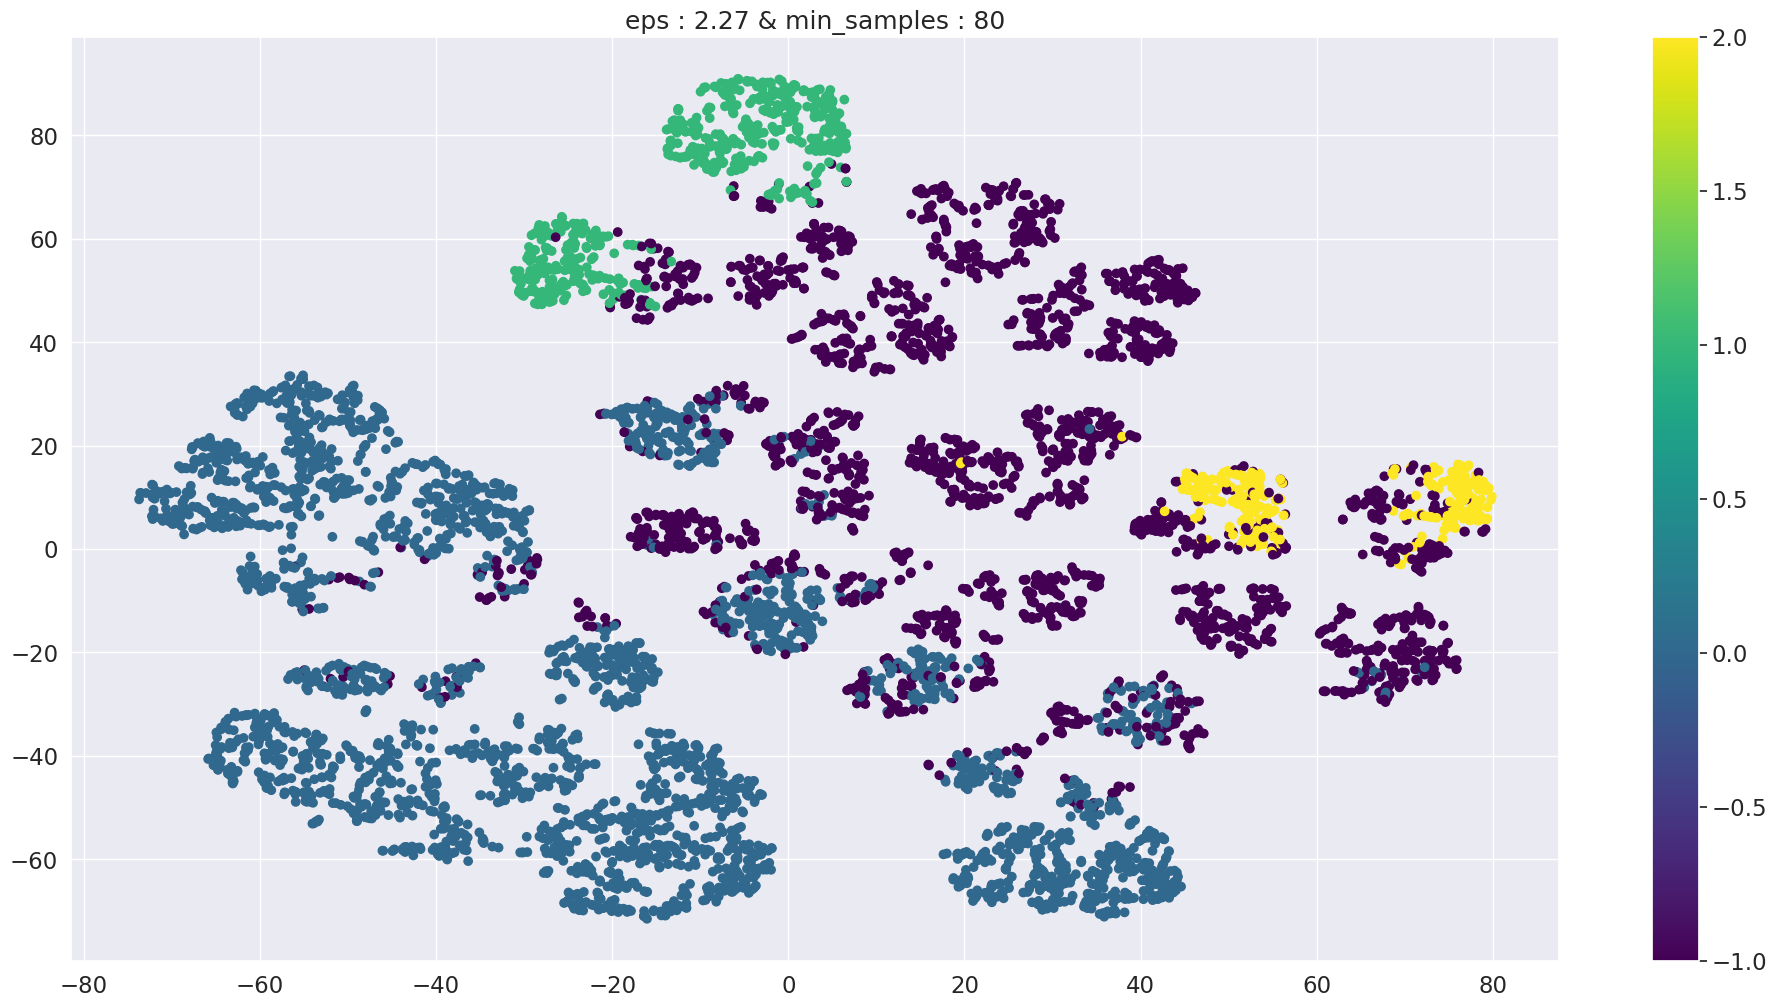

In [98]:
# 시각화를 위한 차원 축소 기법(TSNE) 수행
X_embedded = TSNE(n_components=2).fit_transform(X_All)

# 시각화
fig, ax = plt.subplots(figsize=(24, 12))

# scatter 함수의 반환값을 변수에 할당
scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=dbscan_all.labels_, cmap="viridis")

# 컬러바 생성 함수의 인자로 scatter 변수 사용
name = "eps : " + str(eps) + " & " + "min_samples : " + str(min_samples)
plt.colorbar(scatter)
plt.title(str(name))
plt.show()

### Grade

In [104]:
data['Grade'] = dbscan_yes.labels_
Grade_noise = data[data['Grade'] == -1]
Grade_0 = data[data['Grade'] == 0]
Grade_1 = data[data['Grade'] == 1]
Grade_2 = data[data['Grade'] == 2]
# Grade_3 = data[data['Grade'] == 3]
# Grade_4 = data[data['Grade'] == 4]

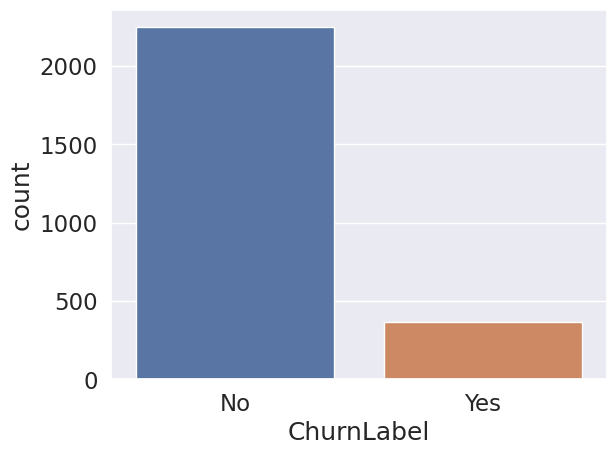

In [105]:
show_hist(Grade_noise)

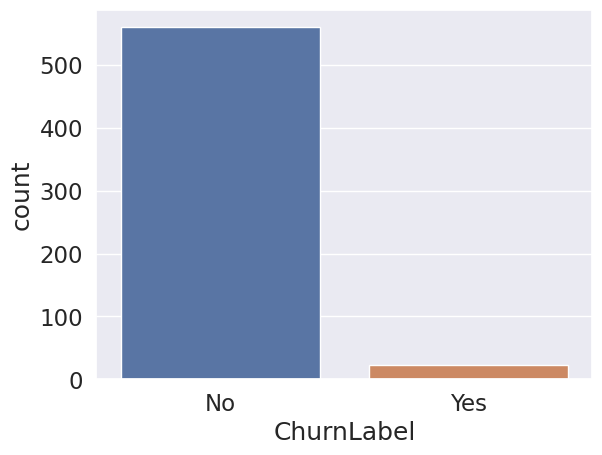

In [102]:
show_hist(Grade_1)

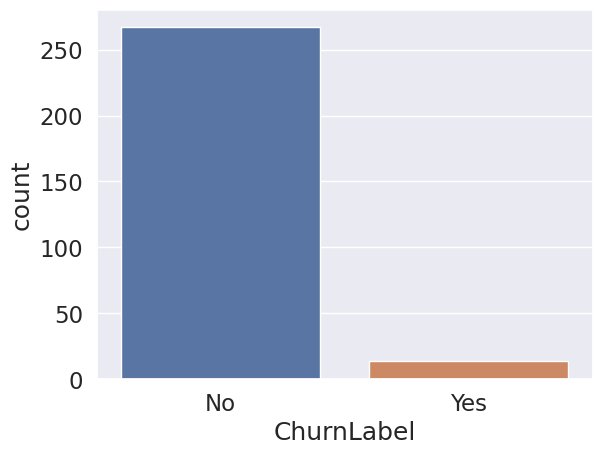

In [103]:
show_hist(Grade_2)

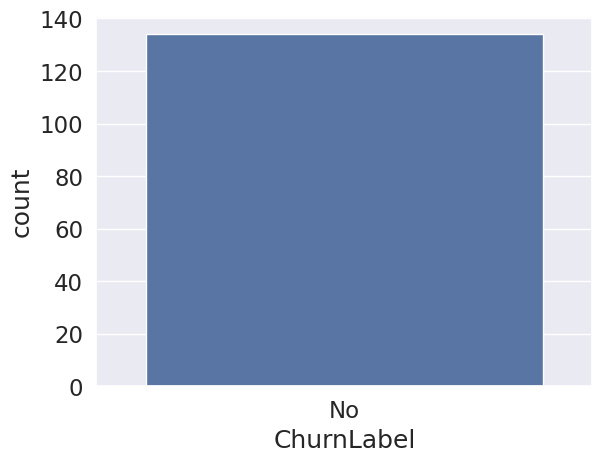

In [68]:
show_hist(Grade_1)

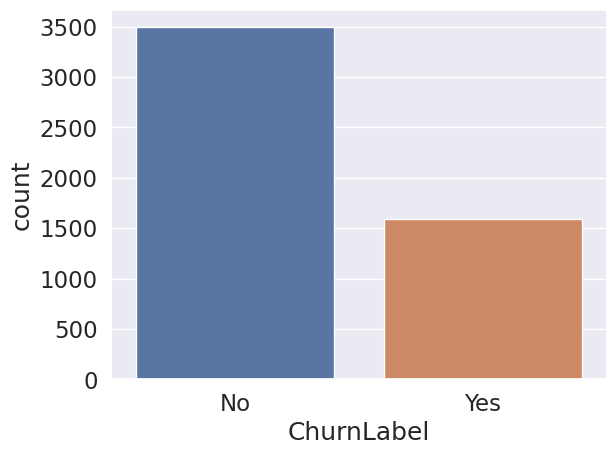

In [69]:
show_hist(Grade_0)

In [72]:
list(label_all)[:-1]

[0, 1, 2, 3, 4]

# Kmeans

## Data

In [170]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# Yes 클래스 데이터만 추출
yes_data = data[data['ChurnLabel'] == 'Yes']
no_data = data[data['ChurnLabel'] == 'No']

# 분석에 사용할 컬럼 선택 : 명목형 변수 사용 X
# X_yes = yes_data.drop(['CustomerId', "ChurnLabel", "PaymentMethod", "OnlineSecurity", "TechSupport", "Dependents", "OnlineBackup"], axis=1)
# X_no = no_data.drop(['CustomerId', "ChurnLabel", "PaymentMethod", "OnlineSecurity", "TechSupport", "Dependents", "OnlineBackup"], axis=1)
# X_All = data.drop(['CustomerId', "ChurnLabel", "PaymentMethod", "OnlineSecurity", "TechSupport", "Dependents", "OnlineBackup"], axis=1)

# 분석에 사용할 컬럼 선택 : 명목형 변수 사용 O
X_yes = yes_data.drop(['CustomerId', "ChurnLabel"], axis=1)
X_no = no_data.drop(['CustomerId', "ChurnLabel"], axis=1)
X_All = data.drop(['CustomerId', "ChurnLabel"], axis=1)

# 데이터 스케일링
scaler = StandardScaler()
X_yes = scaler.fit_transform(X_yes)
X_no = scaler.fit_transform(X_no)
X_All = scaler.fit_transform(X_All)

## Model(Kmeans)

In [171]:
# K-means를 사용하여 군집 생성
n_clusters = 4
KMeans_yes = KMeans(n_clusters=n_clusters)
clusters = KMeans_yes.fit_predict(X_yes)

# 각 군집의 출현 빈도 계산
unique, counts = np.unique(clusters, return_counts=True)
label_counts = dict(zip(unique, counts))

# 출력
print(label_counts)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{0: 234, 1: 913, 2: 298, 3: 257}


In [172]:
# 미이탈자를 군집에 분류
new_labels = KMeans_yes.predict(X_All)

# 각 군집의 출현 빈도 계산
unique, counts = np.unique(new_labels, return_counts=True)
label_counts = dict(zip(unique, counts))

# 출력
print(label_counts)

{0: 1571, 1: 2330, 2: 1885, 3: 1077}


In [173]:
data["Grade"] = new_labels
data["Grade"]

0       0
1       2
2       1
3       1
4       0
       ..
6858    3
6859    1
6860    3
6861    3
6862    1
Name: Grade, Length: 6863, dtype: int32

In [174]:
Grade_0 = data[data['Grade'] == 0]
Grade_1 = data[data['Grade'] == 1]
Grade_2 = data[data['Grade'] == 2]
Grade_3 = data[data['Grade'] == 3]

Grade_0


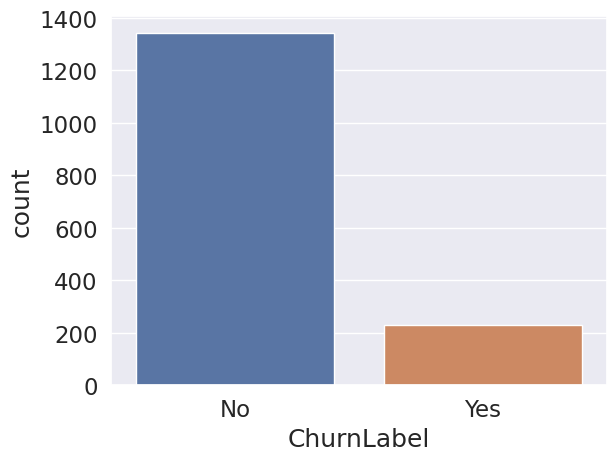

No: 1342
Yes: 229
rate: 85.42329726288988


In [192]:
print("Grade_0")
show_hist(Grade_0)
No = Grade_0['ChurnLabel'].value_counts()[0]
Yes = Grade_0['ChurnLabel'].value_counts()[1]
print("No:", No)
print("Yes:", Yes)
print("rate:", 100*(No / (No+Yes)))

Grade_1


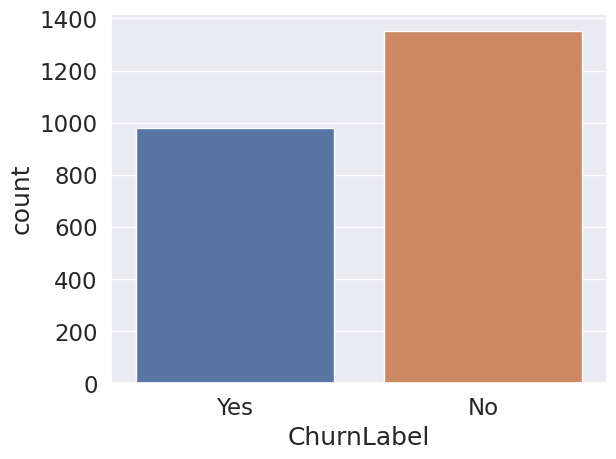

No: 1351
Yes: 979
rate: 57.982832618025746


In [193]:
print("Grade_1")
show_hist(Grade_1)
No = Grade_1['ChurnLabel'].value_counts()[0]
Yes = Grade_1['ChurnLabel'].value_counts()[1]
print("No:", No)
print("Yes:", Yes)
print("rate:", 100*(No / (No+Yes)))

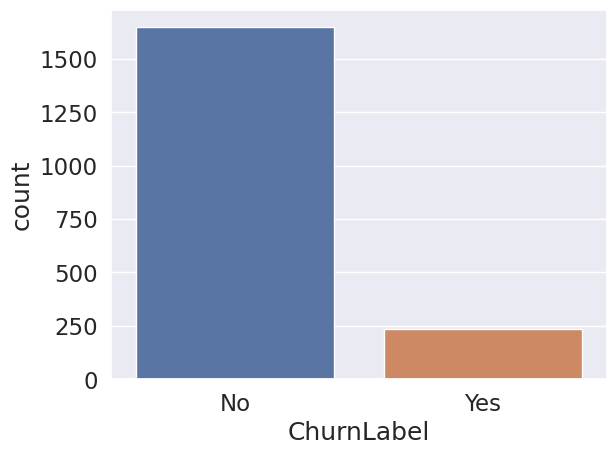

No: 1648
Yes: 237
rate: 87.42705570291777


In [187]:
show_hist(Grade_2)
No = Grade_2['ChurnLabel'].value_counts()[0]
Yes = Grade_2['ChurnLabel'].value_counts()[1]
print("No:", No)
print("Yes:", Yes)
print("rate:", 100*(No / (No+Yes)))

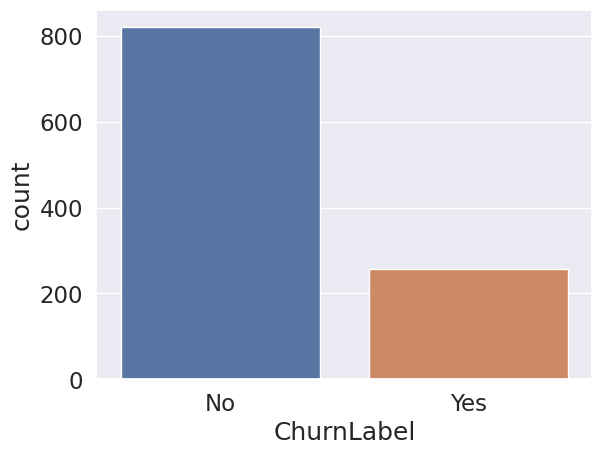

No: 820
Yes: 257
rate: 76.13741875580315


In [188]:
show_hist(Grade_3)
No = Grade_3['ChurnLabel'].value_counts()[0]
Yes = Grade_3['ChurnLabel'].value_counts()[1]
print("No:", No)
print("Yes:", Yes)
print("rate:", 100*(No / (No+Yes)))